In [457]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.sparse import diags
from tqdm import tqdm
import networkx as nx
import scipy.sparse
import matplotlib.pyplot as plt

os.getcwd()

'/Users/jonnycodd/Documents/MASTERS/Networks/RecommendationSystems_NetworksFP/code'

# Load data

In [458]:
# Load bi-partide network
bi_partide_network =  pd.read_csv("../output/collbarfilter.csv")

In [459]:
bi_partide_network.drop(bi_partide_network.columns[0], axis=1, inplace=True)
bi_partide_network.reset_index(drop=True, inplace=True)
bi_partide_network

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
# Create binary matrix 
binary_network = bi_partide_network.copy()
binary_network.iloc[:, 1:] = binary_network.iloc[:, 1:].notna().astype(int)
binary_network = binary_network.fillna(0)

# Convert to sparse matrix
binary_network_sparse = csr_matrix(binary_network.values)

binary_network


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Binary probabilistic spreading

In [461]:
def probabilistic_spreading_binary(user_item_sparse, user_index, K):
    
    # Create vector of the movies the individual has seen
    seen_movies = user_item_sparse[user_index, :]
    
    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()
    
    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:][::-1]
    

    return final_movie_weights_dense,  top_k_indices



In [462]:
weights, indices =  probabilistic_spreading_binary(binary_network_sparse, 0, 20)
binary_network.columns[indices]


Index(['Shawshank Redemption, The (1994)', 'Terminator 2: Judgment Day (1991)',
       'Godfather, The (1972)', 'Apollo 13 (1995)', 'True Lies (1994)',
       'Sixth Sense, The (1999)', 'Aladdin (1992)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Speed (1994)',
       'Die Hard (1988)', 'Lion King, The (1994)', 'Aliens (1986)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Ace Ventura: Pet Detective (1994)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Beauty and the Beast (1991)', 'Shrek (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'GoldenEye (1995)', 'Die Hard: With a Vengeance (1995)'],
      dtype='object')

In [463]:
# Define a function to plot the movie degree after different iterations
def movie_degree_rank_plot(movie_degrees, num_iterations):
    sorted_indices = np.argsort(movie_degrees)[::-1]
    sorted_degrees = movie_degrees[sorted_indices]
    ranks = np.arange(1, len(movie_degrees) + 1)

    # Plotting degree rank plot
    plt.plot(ranks, sorted_degrees, marker='o', linestyle='-', color='b')
    plt.title(f'Degree Rank Plot after {num_iterations} iterations')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.savefig(f'../figures/Prob S movie rank plot - {num_iterations} iterations')
    plt.show()


In [464]:
# Define a function to plot the movie degree after the algorithm has run
def plot_recomendation_counts(reccomendation_counts, num_iterations):
    
    # Example column labels from the bipartite network (replace it with your actual data)
    column_labels = bi_partide_network.columns

    # Get indices of nonzero movie degree values
    nonzero_indices = np.where(reccomendation_counts != 0)[0]

    # Filtered movie degree array and corresponding labels
    filtered_movie_degree = reccomendation_counts[nonzero_indices]
    filtered_column_labels = [column_labels[i] for i in nonzero_indices]

    # Sort filtered movie degree array and corresponding labels
    sorted_indices = np.argsort(filtered_movie_degree)[::-1]
    sorted_filtered_movie_degree = filtered_movie_degree[sorted_indices][:500]
    sorted_filtered_column_labels = [filtered_column_labels[i] for i in sorted_indices][:500]

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_filtered_movie_degree)), sorted_filtered_movie_degree)
    # Removed xticks setting for labels
    plt.title(f'Recommendations count after {num_iterations} iterations')
    plt.ylabel('Recommendation Count')
    plt.xlabel('Rank')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(f'../figures/Prob S movie recommendations - {num_iterations} iterations')
    plt.show()

In [465]:
def temporal_recommendations(binary_network_sparse, iterations, plot_points = []):
    # Calculate initial movie degrees
    movie_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
    reccomendation_counts = np.zeros(len(movie_degrees))

    for j in tqdm(range(1, iterations + 1), desc="Progress"):
        recommendations = []

        # Loop over users
        for i in range(binary_network_sparse.shape[0]):
            # Get index of top recommended film
            _, index = probabilistic_spreading_binary(binary_network_sparse, i, 1)
            recommendations.append((i, index[0]))
            reccomendation_counts[index[0]] += 1

        # Update matrix 
        row_indices, col_indices = zip(*recommendations)
        binary_network_sparse[row_indices, col_indices] = 1

        # Update movie degrees
        updated_degrees = np.array(binary_network_sparse.sum(axis=0)).squeeze()
        movie_degrees += updated_degrees - movie_degrees

        # Store degree information at plot_points iterations
        if j in plot_points:
            movie_degree_rank_plot(movie_degrees, j)
            plot_recomendation_counts(reccomendation_counts, j)


    return binary_network_sparse, movie_degrees, reccomendation_counts

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]/Users/jonnycodd/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Progress:   1%|          | 9/1000 [00:18<32:21,  1.96s/it]

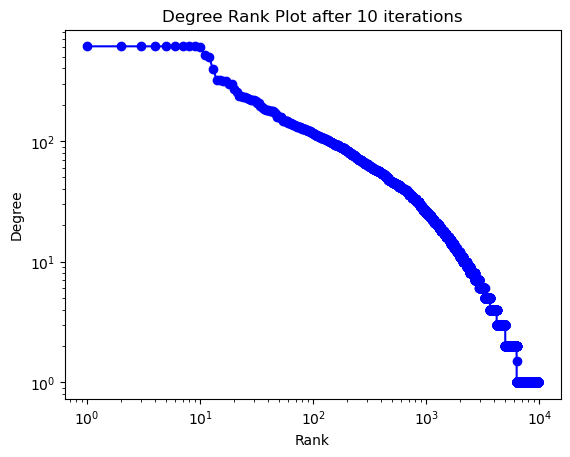

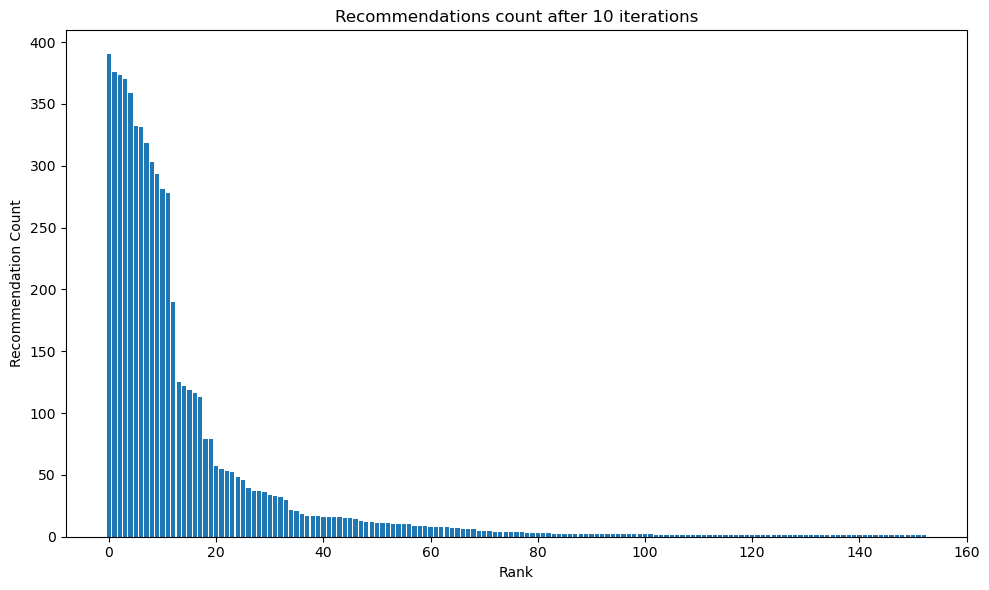

Progress:  10%|▉         | 99/1000 [03:34<36:41,  2.44s/it]

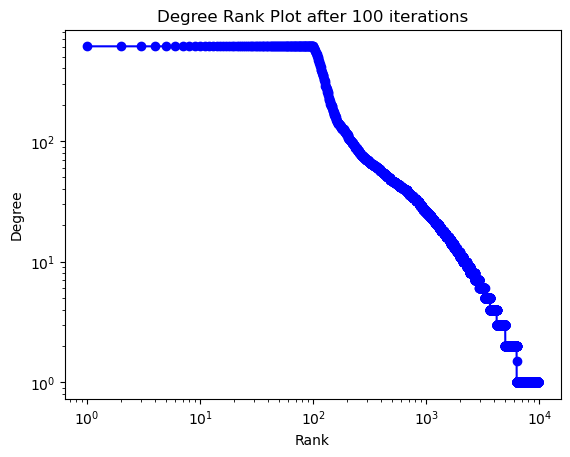

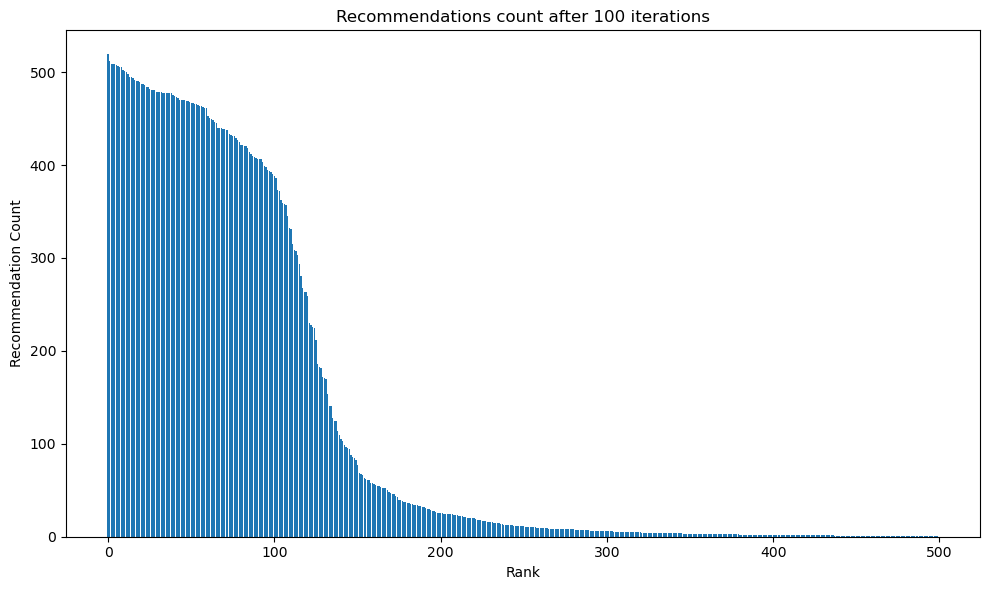

Progress:  50%|████▉     | 499/1000 [26:44<36:59,  4.43s/it]

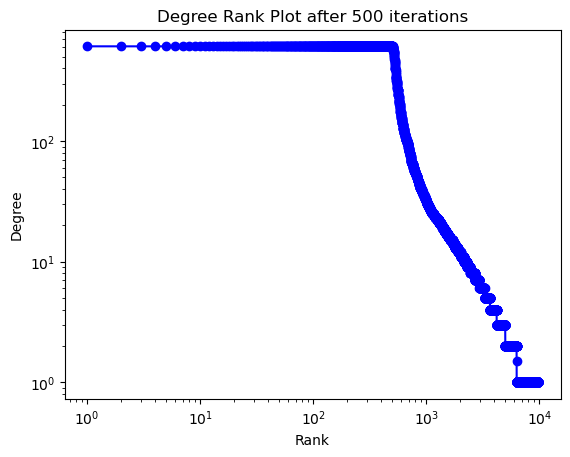

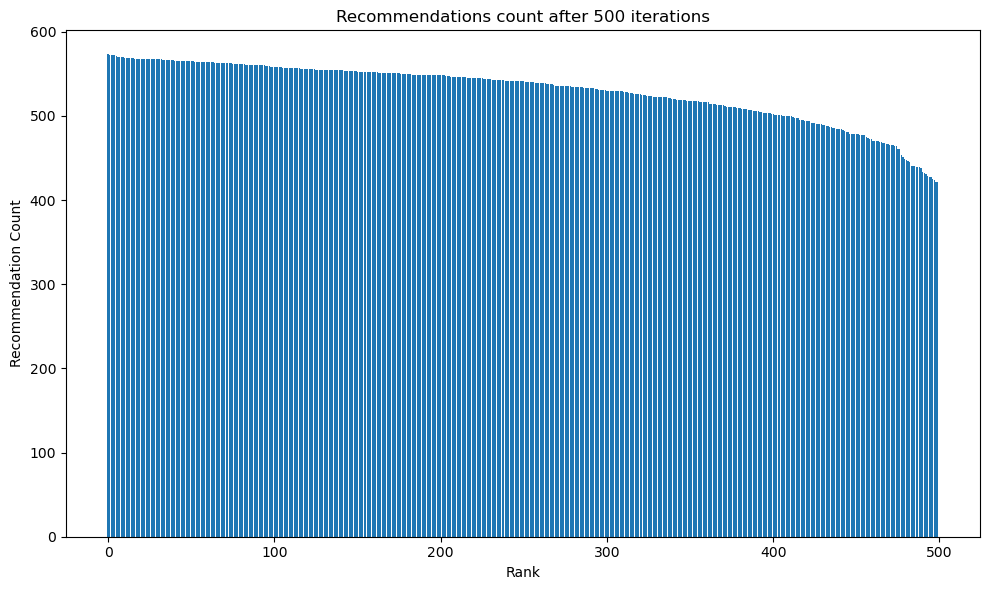

Progress:  61%|██████    | 611/1000 [36:06<22:59,  3.55s/it]


KeyboardInterrupt: 

In [466]:
# Example usage
binary_network_sparse, movie_degrees, reccomendation_counts = temporal_recommendations(binary_network_sparse, 1000, [10, 100, 500, 1000])

# Different initial weighting

In [ ]:
def probabilistic_spreading_with_ratings(user_item_df, user_index, K):

    # Convert to binary matrix
    user_item_df_binary = user_item_df.copy()
    user_item_df_binary.iloc[:, 1:] = user_item_df_binary.iloc[:, 1:].notna().astype(int)
    user_item_df_binary = user_item_df_binary.fillna(0)

    # Convert the DataFrame to a sparse matrix
    user_item_sparse = csr_matrix(user_item_df_binary.values)
    
    # Give initial weights to movies based on ratings 
    ratings_filled = user_item_df.fillna(0)
    ratings_filled_sparse = csr_matrix(ratings_filled.values)
    seen_movies = ratings_filled_sparse[user_index, :]

    # Calculate the degree (sum) of each movie and user
    movie_degree = user_item_sparse.sum(axis=0)
    user_degree = user_item_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user
    movie_degree_inv = diags(1.0 / movie_degree.A.ravel(), offsets=0)
    user_degree_inv = diags(1.0 / user_degree.A.ravel(), offsets=0)
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users
    resource_to_user = user_item_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights
    final_movie_weights = user_item_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already seen
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()
    
    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:]
    
    # Map indices to column names
    top_k_movies = user_item_df.columns[top_k_indices]

    return final_movie_weights_dense, list(top_k_movies)[::-1]



# 2

In [ ]:
def probabilistic_spreading_with_ratings_2(user_item_df, user_index, K):
    # Fill missing values with zeros for ratings
    ratings_filled = user_item_df.fillna(0)
    
    # Convert the ratings DataFrame to a sparse matrix
    ratings_filled_sparse = csr_matrix(ratings_filled.values)
    
    # Use the ratings directly as seen movies/resources
    seen_movies = ratings_filled_sparse[user_index, :]

    # Calculate the degree (sum) of each movie and user based on ratings
    movie_degree = ratings_filled_sparse.sum(axis=0)
    user_degree = ratings_filled_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user based on ratings
    movie_degree_inv = diags(1.0 / np.maximum(movie_degree.A.ravel(), 1), offsets=0)  # Avoid division by zero
    user_degree_inv = diags(1.0 / np.maximum(user_degree.A.ravel(), 1), offsets=0)  # Avoid division by zero
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users based on ratings
    resource_to_user = ratings_filled_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights based on ratings
    final_movie_weights = ratings_filled_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already rated
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()
    
    # Get the indices of the top K values
    top_k_indices = np.argsort(final_movie_weights_dense)[-K:]
    
    # Map indices to column names, adjusting for potential off-by-one errors
    top_k_movies = user_item_df.columns[1:][top_k_indices]  # Adjust if necessary

    top_k_indices = [x + 1 for x in top_k_indices]

    return final_movie_weights_dense, list(top_k_movies)[::-1], list(top_k_indices)[::-1]


In [ ]:
weights, titles, indices =  probabilistic_spreading_with_ratings_2(bi_partide_network, 0, 1)
titles

['Requiem for a Heavyweight (1962)',
 'Lady from Shanghai, The (1947)',
 'Fiendish Plot of Dr. Fu Manchu, The (1980)',
 'Defending Your Life (1991)',
 'Patton Oswalt: My Weakness Is Strong (2009)',
 'My Family (1995)',
 'Wallace & Gromit: The Wrong Trousers (1993)',
 'Fast and the Furious, The (2001)',
 'Dope (2015)',
 'You, Me and Dupree (2006)',
 'She Wore a Yellow Ribbon (1949)',
 'Courier (1987)',
 "On Her Majesty's Secret Service (1969)",
 'Danny Collins (2015)',
 'Operation Petticoat (1959)',
 '2046 (2004)',
 'Green Hornet, The (2011)',
 'Snow Falling on Cedars (1999)',
 'Terminator 3: Rise of the Machines (2003)',
 'Godfather: Part II, The (1974)',
 'Aladdin and the King of Thieves (1996)',
 'Lord of the Rings: The Return of the King, The (2003)',
 "Twelve O'Clock High (1949)",
 'Skeleton Key, The (2005)',
 'Alien³ (a.k.a. Alien 3) (1992)',
 'Die Hard 2 (1990)',
 'Godfather: Part III, The (1990)',
 'Blade Runner 2049 (2017)',
 'Memoirs of a Geisha (2005)',
 'Lion in Winter, The 

In [ ]:
# Function to randomly remove 10% of the ratings from a DataFrame
def remove_ratings(df, perc):
    # Flatten the DataFrame to get all indices for non-NaN values
    non_nan_indices = df.stack().index
    
    # Calculate 10% of the non-NaN values
    num_to_remove = int(len(non_nan_indices) * perc)
    
    # Randomly select indices to remove
    indices_to_remove = np.random.choice(range(len(non_nan_indices)), size=num_to_remove, replace=False)
    
    # Create the DataFrame for removed ratings with the same structure as `df`
    removed_ratings_df = pd.DataFrame(index=df.index, columns=df.columns)
    
    # Iterate over the selected indices and set the corresponding values to NaN in `df`
    # and move them to `removed_ratings_df`
    for idx in indices_to_remove:
        user, movie = non_nan_indices[idx]
        removed_ratings_df.at[user, movie] = df.at[user, movie]
        df.at[user, movie] = np.nan
    
    return df, removed_ratings_df

In [ ]:
train, test = remove_ratings(bi_partide_network,0.2)

In [ ]:
# Call your prediction function to get the predicted movie rankings
weights, predicted_titles, _ = probabilistic_spreading_with_ratings_2(train, 1, 1000)

# Retrieve the actual ratings for the user from the test dataset
true_ratings = test.loc[user_id].dropna()

# Sort the actual ratings to get the true order
true_order = true_ratings.sort_values(ascending=False)

# Match the predicted titles with the actual rated movies to get the predicted order
predicted_order = [title for title in predicted_titles if title in true_order.index]


In [ ]:
predicted_titles

["'71 (2014)",
 'Fighter, The (2010)',
 'Kill Command (2016)',
 "Big Momma's House (2000)",
 'Supercop (Police Story 3: Supercop) (Jing cha gu shi III: Chao ji jing cha) (1992)',
 'Raiders of the Lost Ark: The Adaptation (1989)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Croupier (1998)',
 'Lords of Dogtown (2005)',
 'Seven Brides for Seven Brothers (1954)',
 'One Hour Photo (2002)',
 'American Buffalo (1996)',
 'Goodnight Mommy (Ich seh ich seh) (2014)',
 'Resident Evil (2002)',
 'Terminator 3: Rise of the Machines (2003)',
 'Guardians of the Galaxy 2 (2017)',
 'Terms of Endearment (1983)',
 "Twelve O'Clock High (1949)",
 'Jurassic Park III (2001)',
 'Alien Contamination (1980)',
 'Apocalypto (2006)',
 'Blade Runner 2049 (2017)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Casino Jack (2010)',
 'Good, the Bad, the Weird, The (Joheunnom nabbeunnom isanghannom) (2008)',
 'Alien³ (a.k.a. Alien 3) (1992)',
 'Hoop Dreams (1994)',
 'Anchors Aweigh (1945)',
 'Fifty Shades

In [ ]:
predicted_order

['Howard the Duck (1986)',
 'Gladiator (2000)',
 'Goldfinger (1964)',
 'Back to the Future Part III (1990)']

In [ ]:
true_order

Indiana Jones and the Temple of Doom (1984)         2.5
Three Caballeros, The (1945)                        2.5
Messenger: The Story of Joan of Arc, The (1999)     2.5
SLC Punk! (1998)                                    2.5
Scream 3 (2000)                                     2.5
Goodfellas (1990)                                   2.5
Goldfinger (1964)                                   2.5
Gladiator (2000)                                    2.5
Quiet Man, The (1952)                               2.5
Fargo (1996)                                        2.5
Tombstone (1993)                                    2.5
Willy Wonka & the Chocolate Factory (1971)          2.5
Clockwork Orange, A (1971)                          2.5
Canadian Bacon (1995)                               2.5
Blues Brothers, The (1980)                          2.5
Big Lebowski, The (1998)                            2.5
Wizard of Oz, The (1939)                            2.5
Newton Boys, The (1998)                         

In [ ]:
# Adjusting the function to output only an ordered list of the top predictions in descending order.
def probabilistic_spreading_with_ratings_2(user_item_df, user_index, K):
    # Fill missing values with zeros for ratings
    ratings_filled = user_item_df.fillna(0)
    
    # Convert the ratings DataFrame to a sparse matrix
    ratings_filled_sparse = csr_matrix(ratings_filled.values)
    
    # Use the ratings directly as seen movies/resources
    seen_movies = ratings_filled_sparse[user_index, :]

    # Calculate the degree (sum) of each movie and user based on ratings
    movie_degree = ratings_filled_sparse.sum(axis=0)
    user_degree = ratings_filled_sparse.sum(axis=1)
    
    # Calculate the inverse degree of each movie and user based on ratings
    movie_degree_inv = diags(1.0 / np.maximum(movie_degree.A.ravel(), 1), offsets=0)  # Avoid division by zero
    user_degree_inv = diags(1.0 / np.maximum(user_degree.A.ravel(), 1), offsets=0)  # Avoid division by zero
    
    # Weighting seen movies by inverse movie degree
    seen_movies_weighted = movie_degree_inv.dot(seen_movies.T)
    
    # Distribute resources of movies to the users based on ratings
    resource_to_user = ratings_filled_sparse.dot(seen_movies_weighted)
    
    # Weighting resources to users by inverse user degree
    resource_to_user_weighted = user_degree_inv.dot(resource_to_user)
    
    # Calculate final movie weights based on ratings
    final_movie_weights = ratings_filled_sparse.T.dot(resource_to_user_weighted)
    final_movie_weights = final_movie_weights.T  # Transpose to match original shape
    
    # Zero out the movies already rated
    final_movie_weights[0, seen_movies.nonzero()[1]] = 0
    
    # Convert to dense for argsort operation
    final_movie_weights_dense = np.array(final_movie_weights.todense()).ravel()
    
    # Get the indices of the top K values in descending order
    top_k_indices_desc = np.argsort(final_movie_weights_dense)[-K:][::-1]
    
    # Map indices to column names
    top_k_movies_desc = user_item_df.columns[top_k_indices_desc]  # Adjust the indexing if necessary

    return list(top_k_movies_desc)


